In [1]:
from tensorflow import keras

In [7]:
import tensorflow as tf 

In [10]:
meteor_resnet = tf.keras.applications.ResNet101(
    include_top=True, weights='imagenet', input_tensor=None,
    input_shape=None, pooling=None, classes=1000
)

In [14]:
meteor_resnet.summary()

Model: "resnet101"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_2[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
__________________________________________________________________________________________

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.994175 to fit



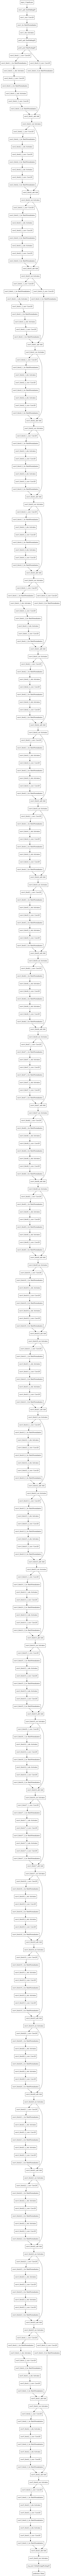

In [12]:
tf.keras.utils.plot_model(
    meteor_resnet, to_file='model.png', show_shapes=False,
    show_layer_names=True, rankdir='TB', expand_nested=False, dpi=96
)

In [15]:
meteor2_resnet101v2 = tf.keras.applications.ResNet101V2(
    include_top=True, weights='imagenet', input_tensor=None,
    input_shape=None, pooling=None, classes=1000,
    classifier_activation='softmax'
)

179519488/179518384 [==============================] - 1s 0us/step


In [16]:
meteor2_resnet101v2.summary()

Model: "resnet101v2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_3[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
pool1_pad (ZeroPadding2D)       (None, 114, 114, 64) 0           conv1_conv[0][0]                 
________________________________________________________________________________________

In [29]:
#access a given layer of the model
layer_conv2_block2_out = meteor2_resnet101v2.get_layer('conv2_block2_out')


In [35]:
#visualise the input
meteor2_resnet101v2.input

<tf.Tensor 'input_3:0' shape=(None, 224, 224, 3) dtype=float32>

In [36]:
#visualise the output
meteor2_resnet101v2.output

<tf.Tensor 'predictions/Softmax_2:0' shape=(None, 1000) dtype=float32>

In [ ]:
#visualise the input and output of layer 'conv1_conv'

In [44]:
meteor2_resnet101v2.get_layer('conv1_conv').input

<tf.Tensor 'conv1_pad/Pad_2:0' shape=(None, 230, 230, 3) dtype=float32>

In [45]:
meteor2_resnet101v2.get_layer('conv1_conv').output

<tf.Tensor 'conv1_conv/BiasAdd_2:0' shape=(None, 112, 112, 64) dtype=float32>

In [ ]:
#visualise the input and output of layer 'conv2_block3_2_relu'

In [46]:
meteor2_resnet101v2.get_layer('conv2_block3_2_relu').input

<tf.Tensor 'conv2_block3_2_bn/cond_2/Identity:0' shape=(None, 28, 28, 64) dtype=float32>

In [47]:
meteor2_resnet101v2.get_layer('conv2_block3_2_relu').output

<tf.Tensor 'conv2_block3_2_relu/Relu_2:0' shape=(None, 28, 28, 64) dtype=float32>

In [ ]:
#visualise the input and output of layer 'conv3_block4_2_relu'

In [48]:
meteor2_resnet101v2.get_layer('conv3_block4_2_relu').input

<tf.Tensor 'conv3_block4_2_bn/cond_2/Identity:0' shape=(None, 14, 14, 128) dtype=float32>

In [49]:
meteor2_resnet101v2.get_layer('conv3_block4_2_relu').output

<tf.Tensor 'conv3_block4_2_relu/Relu_2:0' shape=(None, 14, 14, 128) dtype=float32>

In [ ]:
#visualise the input and output of layer 'conv4_block23_2_relu'

In [50]:
meteor2_resnet101v2.get_layer('conv4_block23_2_relu').input

<tf.Tensor 'conv4_block23_2_bn/cond_2/Identity:0' shape=(None, 7, 7, 256) dtype=float32>

In [51]:
meteor2_resnet101v2.get_layer('conv4_block23_2_relu').output

<tf.Tensor 'conv4_block23_2_relu/Relu_2:0' shape=(None, 7, 7, 256) dtype=float32>

In [ ]:
#visualise the input and output of layer 'conv5_block3_2_relu'

In [52]:
meteor2_resnet101v2.get_layer('conv5_block3_2_relu').input

<tf.Tensor 'conv5_block3_2_bn/cond_2/Identity:0' shape=(None, 7, 7, 512) dtype=float32>

In [53]:
meteor2_resnet101v2.get_layer('conv5_block3_2_relu').output

<tf.Tensor 'conv5_block3_2_relu/Relu_2:0' shape=(None, 7, 7, 512) dtype=float32>

In [55]:

meteor_model = tf.keras.Model(inputs=meteor2_resnet101v2.input, outputs=[meteor2_resnet101v2.get_layer('conv1_conv').output, 
                                                                  meteor2_resnet101v2.get_layer('conv2_block3_2_relu').output,
                                                                  meteor2_resnet101v2.get_layer('conv3_block4_2_relu').output,
                                                                  meteor2_resnet101v2.get_layer('conv4_block23_2_relu').output,
                                                                  meteor2_resnet101v2.get_layer('conv5_block3_2_relu').output])

In [56]:
meteor_model.summary()

Model: "functional_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_3[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
pool1_pad (ZeroPadding2D)       (None, 114, 114, 64) 0           conv1_conv[0][0]                 
_______________________________________________________________________________________